<a href="https://colab.research.google.com/github/Kiran-Panhalkar/EDA---Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

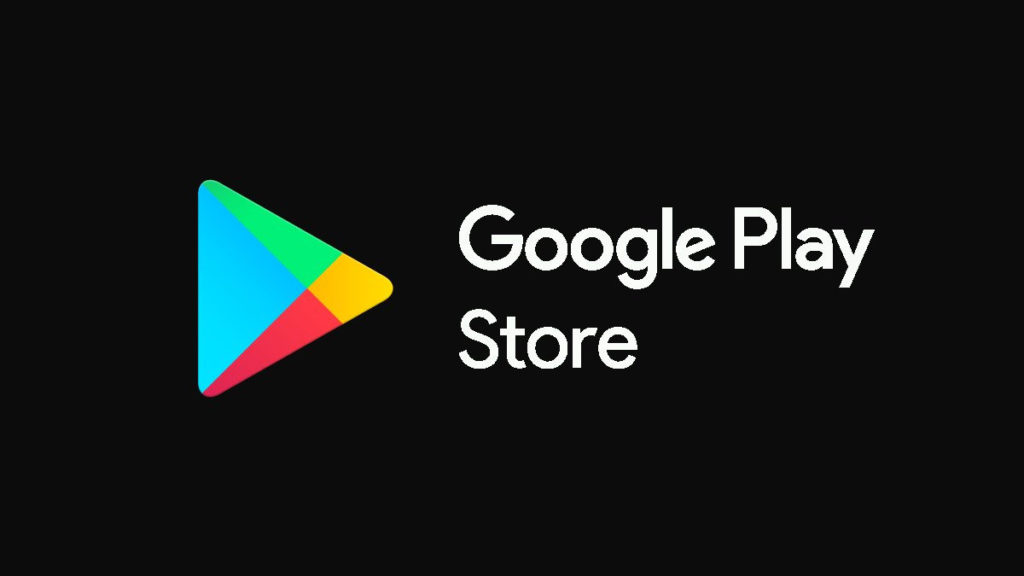

In [46]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualisation

### Read the dataset into dataframe

In [47]:
# reading dataset
GPStore = pd.read_csv('/content/Play Store Data.csv')

In [48]:
# displaying the head or the first 10 rows of the dataframe
GPStore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [49]:
# display the shape of the dtaframe (The No. of rows and columns)
GPStore.shape

(10841, 13)

In [50]:
# prints a summary of the dataframe rows and columns, including information on the datatypes and non-null values
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Explore all columns one by one and check for invalid data and clean data accordingly.

#### App Column:
###### Check for duplicate values in App column if any then drop those rows.

In [51]:
# get the count/frequency of all unique values of app column
GPStore['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
Horror Hospital                                      1
CityMaps2Go Plan Trips Travel Guide Offline Maps     1
Sydney FC Official App                               1
Relax Rain ~ Rain Sounds                             1
Marcus Theatres                                      1
Name: App, Length: 9660, dtype: int64

In [52]:
# shape of dataframe
print(GPStore.shape)

# remove the duplicate values in the dataframe.
GPStore = GPStore.drop_duplicates(subset=['App'], keep='first')

# shape of dataframe after removing duplicates
print(GPStore.shape)

(10841, 13)
(9660, 13)


### Category Column:
##### Check for unique categories. 

In [53]:
# get all the unique values in category column
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<b> In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry. 

In [54]:
# get the row which has category = 1.9
GPStore[GPStore.Category == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [55]:
# remove the row with the specified index; axis 0 implies along the rows
GPStore = GPStore.drop([10472], axis=0)

In [56]:
# display the shape of the dataframe
GPStore.shape

(9659, 13)

### Rating Column:
###### Check for valid rating values

In [57]:
# check the statistical summary
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b> All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.

In [58]:
# find the total no. of missing values present 
GPStore.Rating.isnull().sum()

1463

<b> Drop the entries having null values. 

In [59]:
# remove all the rows having null values
GPStore.dropna(inplace=True)

In [60]:
# display the shape of the dataframe
GPStore.shape

(8190, 13)

### Review Column:
###### Check for any non numeric values if any replace it and convert it to a numeric column

In [61]:
# displays frequency measures
GPStore.Reviews.describe() 

count     8190
unique    5319
top          2
freq        82
Name: Reviews, dtype: object

In [62]:
# The datatype for the reviews column is string
# check for any non-numeric values
GPStore.Reviews.str.isnumeric().sum()

8190

In [63]:
# convert the Review column to numeric
GPStore.Reviews = pd.to_numeric(GPStore.Reviews)

In [64]:
# statistical summary of Review column
GPStore.Reviews.describe()

count    8.190000e+03
mean     2.554354e+05
std      1.986309e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.009500e+03
75%      4.391425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Size Column:
#####  In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes.

In [65]:
# get the count/frequency of all the unique values
GPStore.Size.value_counts()

Varies with device    1169
14M                    148
12M                    146
11M                    143
13M                    143
                      ... 
511k                     1
986k                     1
982k                     1
160k                     1
862k                     1
Name: Size, Length: 413, dtype: int64

In [66]:
# replace all the "Varies with device" with 0
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'k' representing thousand
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('k', '') if 'k' in x else x)

# replace all the 'M' representing Million with M*1024
GPStore.Size = GPStore.Size.apply(lambda x: float(x.replace('M', ''))*1024 if 'M' in x else x)

In [67]:
# convert to float datatype
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [68]:
# statistical summary
GPStore.Size.describe()

count      8190.000000
mean      19108.073834
std       22918.997685
min           0.000000
25%        2867.200000
50%        9625.600000
75%       27648.000000
max      102400.000000
Name: Size, dtype: float64

In [69]:
# rename the size column to Size_in_KB
GPStore = GPStore.rename(columns={'Size':'Size_in_KB'})

In [70]:
GPStore.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Installs column:
###### The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric. 

In [71]:
GPStore.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8190, dtype: object

In [72]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
GPStore.Installs.value_counts()

1000000       1414
100000        1094
10000          986
10000000       937
1000           696
5000000        607
500000         503
50000          456
5000           424
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [73]:
# convert to numeric datatype
GPStore.Installs=pd.to_numeric(GPStore.Installs)

In [74]:
GPStore.Installs.describe()

count    8.190000e+03
mean     9.171613e+06
std      5.827170e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [75]:
import seaborn as sns

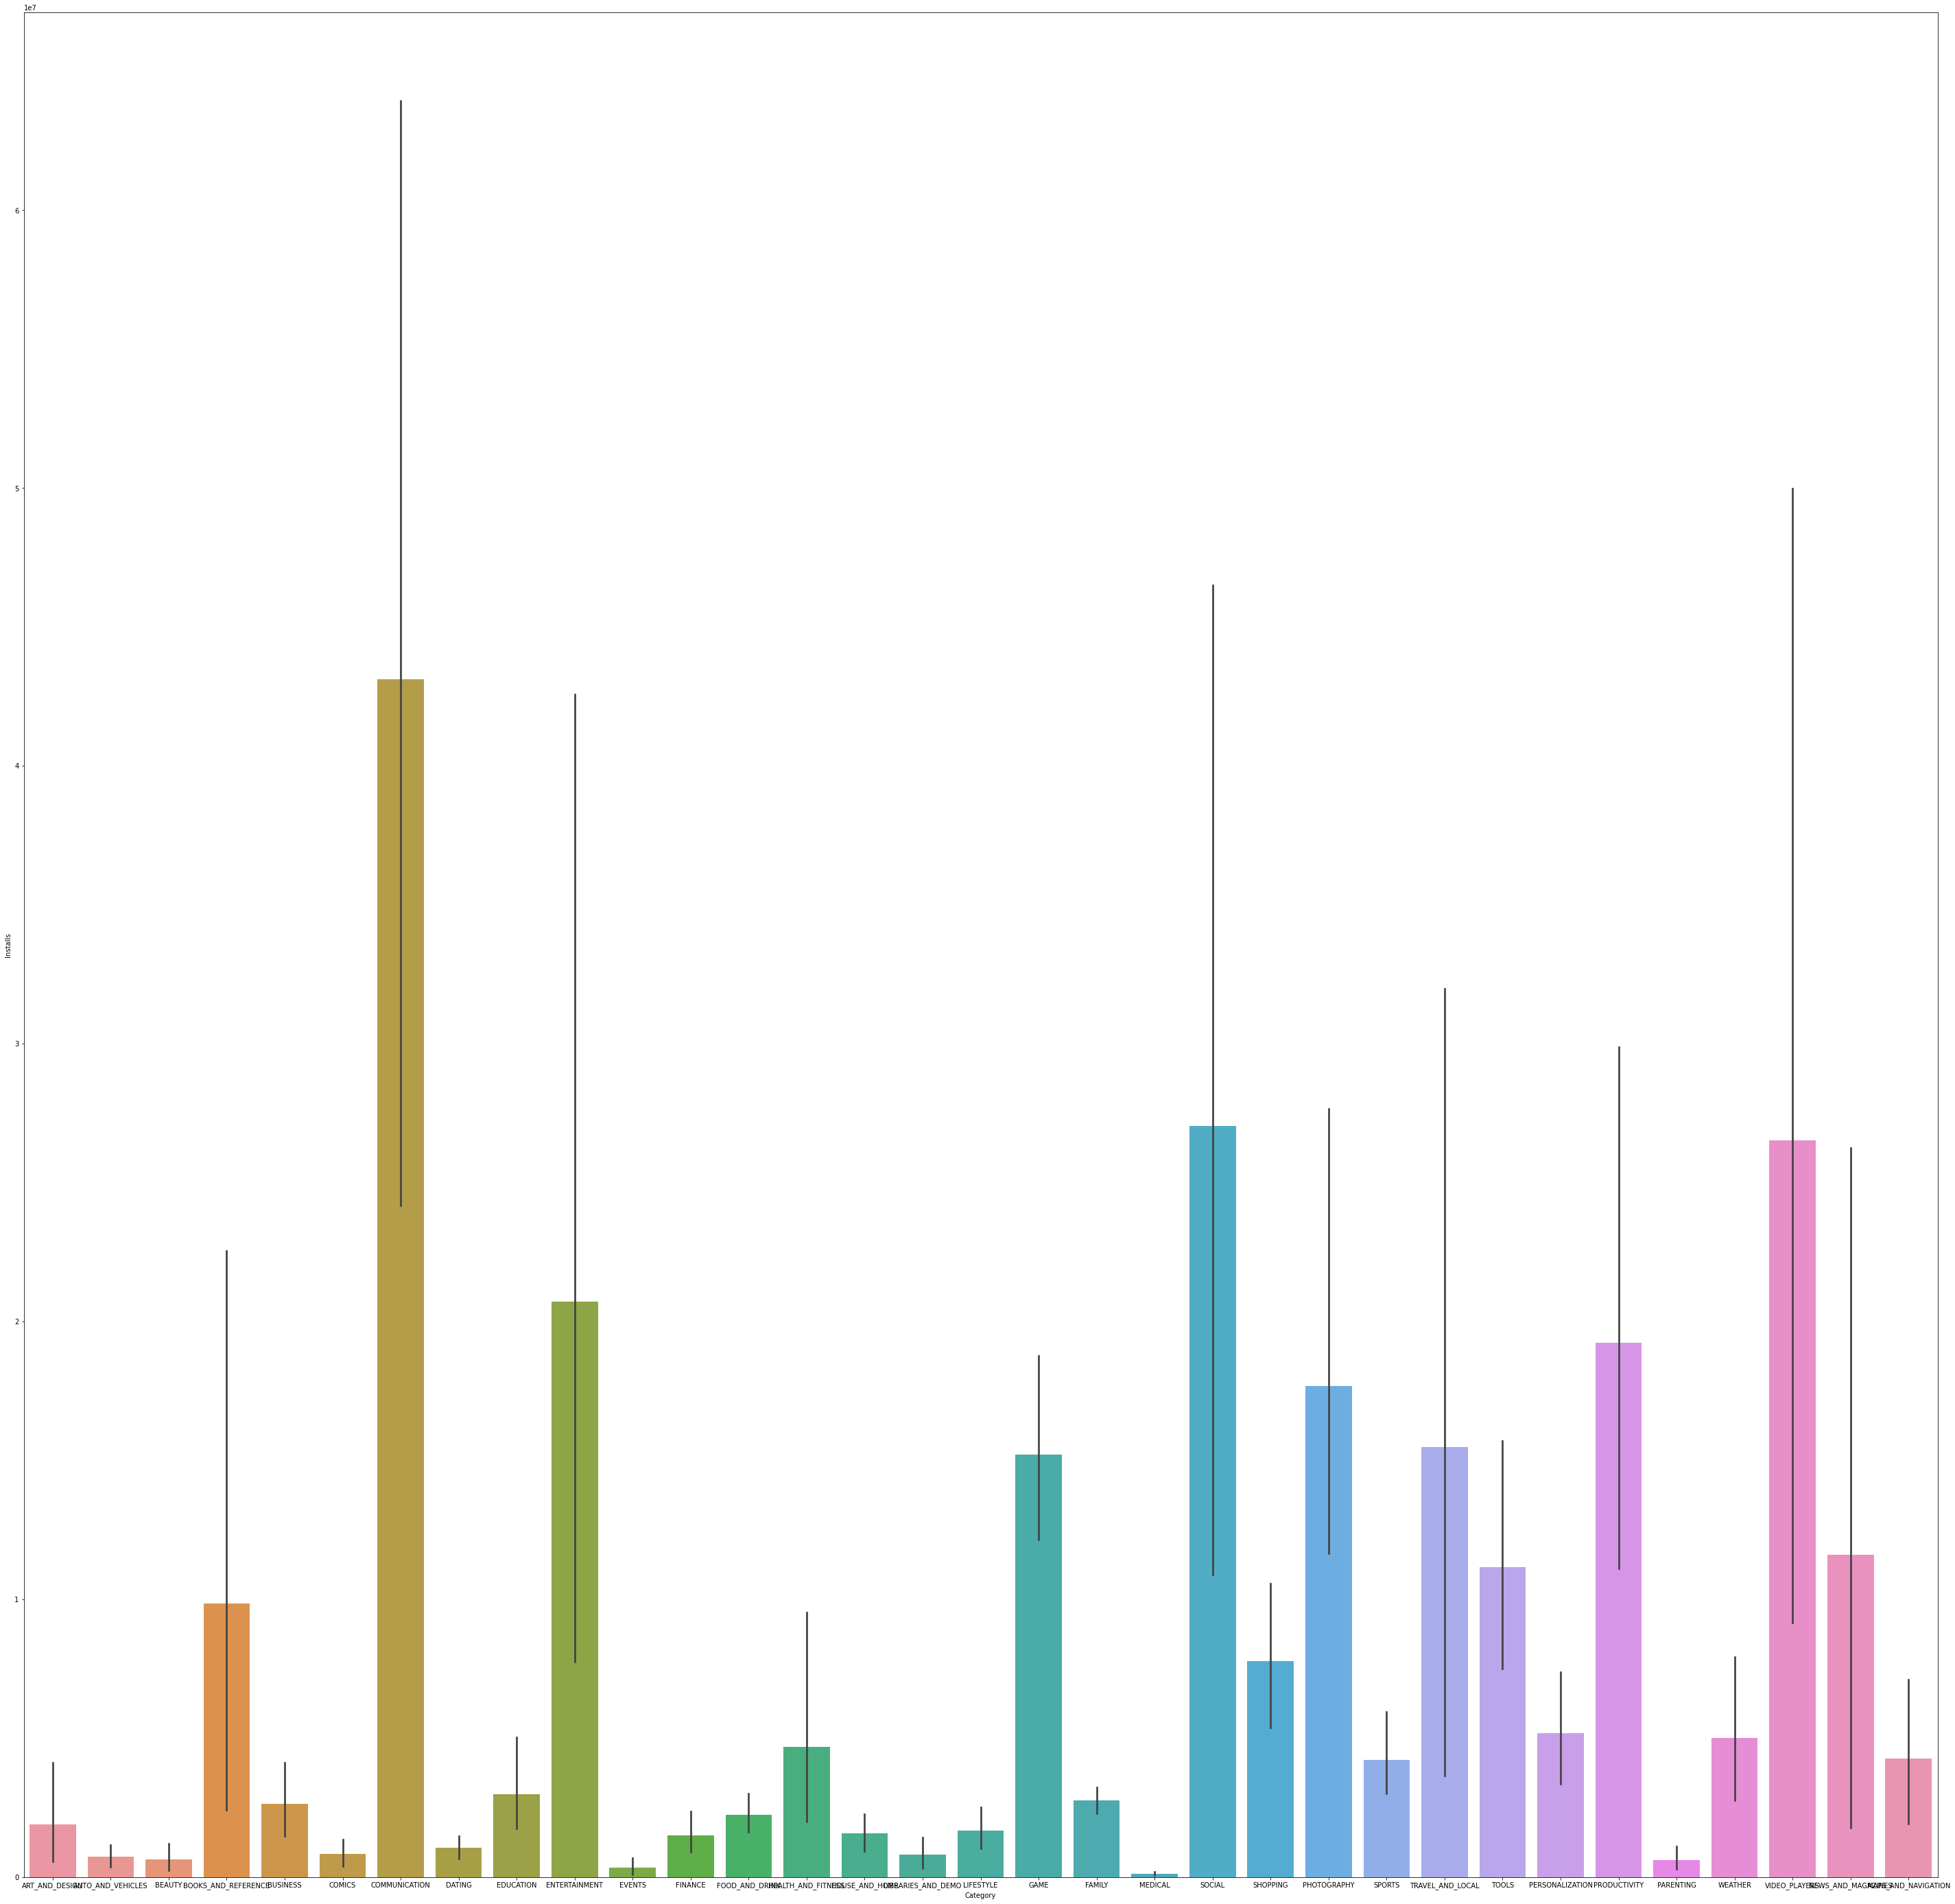

In [76]:
plt.figure(figsize=(50,50))
sns.barplot(x = "Category", y = "Installs", data = GPStore);

from above graph it is observed that communication category has more number of installs

### Check the values in Type column 
##### The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.

In [79]:
# get the frequency/count of all the unique values
GPStore.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64